# 21M.387 Fundamentals of Music Processing
## Problem Set 2: Simpler Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)


## Exercise 1

If the following signal is sampled with a periodicity of $T = 0.04$ seconds, thereby creating a discrete-time (DT) signal $x(n)$, what values of $n$ correspond to:  
a)  the first peak value  
b)  the first zero-crossing  
![](data/ex1a.png)


In [5]:
print "First Peak Value: "+ str(int(0.12/0.04))
print "First Zero Crossing: "+ str(int(0.83/0.04))

First Peak Value: 3
First Zero Crossing: 20


The following DT signal was sampled from a continuous signal $x(t)$ at a sampling rate of $F_s = 150$Hz. When (in seconds) did the following occur in $x(t)$:  
a)  the second peak value  
b)  the second zero-crossing  
![](data/ex1b.png)


In [7]:
fs = 150000.0 #samples per second
snd_peak_value, snd_zero_crossing = map(lambda time:time/fs, [25,17])  
print "2nd Peak Value: "+ str(snd_peak_value)
print "2nd Zero Crossing: "+ str(snd_zero_crossing)

2nd Peak Value: 0.000166666666667
2nd Zero Crossing: 0.000113333333333


## Exercise 2

You have an audio signal $x(n)$, sampled at a sampling rate $F_s$. You create an energy feature signal $E^x(n)$ using a centered window length of $L$ and a hop size of $H$. Consider the following parameter chocies:  
1. $F_s = 22050, L = 1000, H = 500$
2. $F_s = 44100, L = 1024, H = 441$
3. $F_s = 8000,  L = 2048, H = 256$

For each of these parameters, calculate:
- the feature rate $F_f$ of the energy signal  
- the sampling period of the energy signal  
- the time (in seconds) corresponding to $E^x(300)$.

In [11]:
def gen_answers(fs, l, h):
    Ff = fs/h #fs samples/second, h samples/feature
    period = h/fs # seconds/feature 
    E_x_time = (300*h)/fs #seconds 
    return (Ff, period, E_x_time)

Ff, period, E_x_time = gen_answers(22050.0, 1000.0, 500.0)
#Ff, period, E_x_time = gen_answers(44100.0, 1024.0, 441.0)
#Ff, period, E_x_time = gen_answers(8000.0 , 2048.0, 256.0)
print "Ff: "+str(Ff) 
print "Sampling period of energy signal: "+str(period)
print "Time (sec) corresponding to Ex(300): "+str(E_x_time)


Ff: 44.1
Sampling period of energy signal: 0.0226757369615
Time (sec) corresponding to Ex(300): 6.80272108844


## Exercise 3

1. Describe what happens to $E^x(n)$, relatively speaking, when you increase or decrease the hop size $H$.
2. Describe what happens to $E^x(n)$, relatively speaking, when you increase or decrease the window length $L$.
3. What happens if $H > L$


Answers:
1. Ex(n) takes a wider average with increasing H.
   Encompasses more information with smaller H.
2. Increasing window length creates more redundancy in information between hops, and makes the information more course
3. Then some of the signal is not accounted for in E(n)


## Exercise 4

In this exercise, you are given a signal $x(n)$. The simple peak detector `find_peaks(x)` is given below (same as in Lecture), as is the plotting code for the detected peaks.  

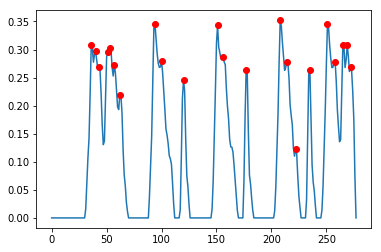

In [12]:
def find_peaks(x) :
    'simple peak detector'
    x0 = x[:-2]   # x
    x1 = x[1:-1]  # x shifted by 1
    x2 = x[2:]    # x shifted by 2

    peak_bools = np.logical_and(x0 < x1, x1 > x2) # where x1 is higher than surroundings
    peaks = np.nonzero( peak_bools )[0] + 1       # get indices of peaks, shift by 1

    return peaks

# load x[n]:
x = np.load('data/ex4.npy')
peaks = find_peaks(x)

plt.figure()
plt.plot(x)
plt.plot(peaks, x[peaks], 'ro');

`find_peaks(x)` defines $n$ as a peak if $x[n]$ is the largest value in a neighborhood of 3 values centered around $n$.

Create a more sophisticated peak detector that defines a peak if it is the largest value centered in a neighborhood of size $L$ (where $L$ is be odd).

You don't have to write this in an optimal way. In other words, you can use a `for` loop if you'd like.

In [13]:
def find_peaks(x, win_len, thresh=0.001) :
    'returns peaks as max value around a centered neighborhood of length win_len'
    pad_size = (win_len-1)/2
    pad = np.zeros(pad_size)
    padded_x = np.concatenate([pad,x,pad])
    max_indices = []
    print len(x)-pad_size
    for i in range(pad_size, len(x)-pad_size):
        lowers = padded_x[i-pad_size:i]
        uppers = padded_x[i+1:i+pad_size+1]
        neighbors = np.hstack([lowers,uppers])
        if padded_x[i] > max(neighbors) and padded_x[i] > thresh:
            max_indices.append(i-pad_size)
    peaks = np.array(max_indices)
    return peaks


Below, try plotting the results with different values of $L$ to see how the results change. $L=3$ should produce the same plot as above.

What value of $L$ returns "just the major peaks"?

273


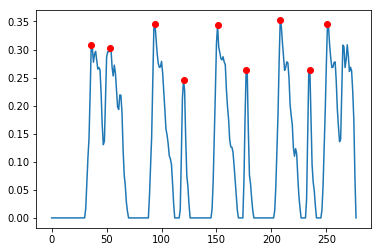

In [14]:
# call the new find_peaks and plot the results. Pick a good value for L.
y = np.load('data/ex4.npy')
peaks = find_peaks(y,11)
plt.figure()
plt.plot(y)
plt.plot(peaks, y[peaks], 'ro');

#11 works pretty well

## Exercise 5

Write a function to return a zero-crossing feature. It should take as inputs:
- the signal $x$
- the window length $L$
- the hop size $H$

The output should be a _normalized_ zero-crossing feature.  
Make sure that your function uses a _centered window_ by using the zero-padding trick.

In [278]:
def count_zerocrossings(x) : #from zero_cross file
    count = 0
    for i in range(len(x)-1) :
        if (x[i] * x[i+1] <= 0):
            count += 1
    return count

def calc_zc(x, win_len, hop_size) :
    M = int(len(x)-win_len)/hop_size + 1
    if win_len % 2 == 0:
        win_len += 1
    pad_size = (win_len-1)/2
    pad = np.zeros(pad_size)
    padded_x = np.concatenate([pad,x,pad])
    
    cross_feature_vec = np.zeros(M)
    for curr_hop in range(0,M):
        i = curr_hop * hop_size + pad_size
        neigh = padded_x[i-pad_size:i+pad_size+1]
        num_crossings = count_zerocrossings(neigh)
        cross_feature_vec[curr_hop] = num_crossings
    return cross_feature_vec/M

Now listen to the test signal below and plot the zc feature signal generated by your function.

Use $L = 1000$ and $H = 500$.


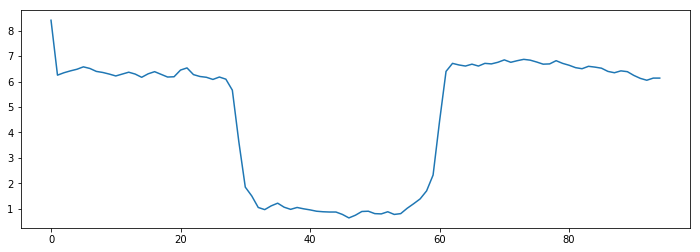

In [279]:
x = load_wav("audio/zc_test.wav")
#ipd.Audio(x,rate=22050)

fs = 22050
y = calc_zc(x,1000,500)
plt.figure()
plt.plot(y)

## Exercise 6

Use Audacity to record a short bit of audio (10-15 seconds) with a few different notes (either instrumental hits, or drums, or "vocal percussion"). Change the project sampling rate to 22050. Export this audio as a mono wav file. Load and listen to it.

In [280]:
# load your file and listen:

x = load_wav("./audio/StingSevenDays.wav")
fs = 22050
ipd.Audio(x, rate = fs)


## Exercise 7

The kick/snare detection code from lecture is given below.

435
[ 19000  30500  40500  55000  67000  76500  91000 103000 127000 138500
 148500 163000 175000 199000 210500]
[ 0.05        0.03366667  0.10266667  0.08333333  0.03666667  0.218
  0.14733333  0.042       0.05466667  0.044       0.186       0.15833333
  0.06666667  0.02933333  0.04033333]


(array([ 40500,  55000,  76500,  91000, 127000, 148500, 163000, 175000]),
 array([ 19000,  30500,  67000, 103000, 138500, 199000, 210500]))

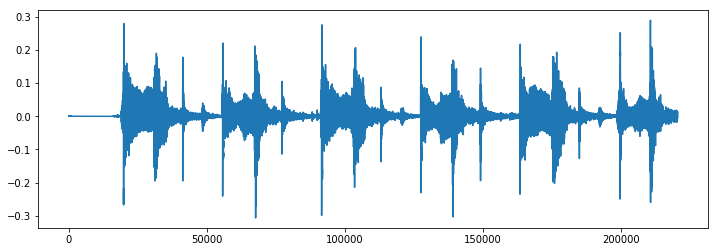

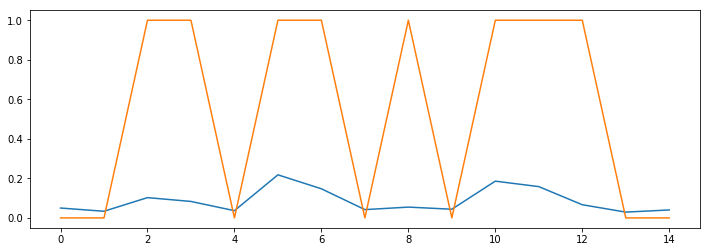

In [365]:
def calc_enf(e) :
    de = e[1:] - e[:-1]
    de[de<0] = 0
    return de

def calc_ave_at_onset(onsets, x, w_len) :
    "for each onset, return the average value of x for a window of length w_len"
    
    # create the output vector
    output = np.empty(len(onsets))

    for i,p in enumerate(onsets):
        output[i] = np.sum(x[p:p+w_len]) / float(w_len)

    return output

def kick_snare_detection(filepath) :
    win_len = 1000
    hop_size = 500
    fs = 22050
    
    x = load_wav(filepath)
    energy = fmp.calc_energy(x, win_len, hop_size)
    
    zc = fmp.calc_zc(x, win_len, hop_size)
    enf = calc_enf(energy)
    
    onsets = find_peaks(enf,11,thresh=0.0003)
    plt.figure()
    plt.plot(x)
    
    print onsets*500
    hit_value = calc_ave_at_onset(onsets, zc, 3)
    print hit_value
    kicks = onsets[hit_value > 0.05]
    snares = onsets[hit_value < 0.05]
    plt.figure()
    
    plt.plot(hit_value)
    plt.plot(hit_value > 0.05)
    return (hop_size*kicks,hop_size*snares)
    
kick_snare_detection("./audio/StingSevenDays.wav")



Modify the function `kick_snare_detection()`, as follows:
- Use your new peak detector instead of the one from lecture.
- Make the function return 2 arrays: an array of kick locations and an array of snare locations. 
- What are the units of these location values?

Units are in samples, but now normalized to the number of samples in the original song

## Exercise 8

Now that you have a set of kick locations and snare locations, synthesize a single click track of kick and snare sounds at the proper locations. 
- You can use the kick_snd and snare_snd sounds below.
- Play that synthesized click track. 
- Did your classifier work reasonably well?
Meh

435
[ 19000  30500  40500  55000  67000  76500  91000 103000 127000 138500
 148500 163000 175000 199000 210500]
[ 0.05        0.03366667  0.10266667  0.08333333  0.03666667  0.218
  0.14733333  0.042       0.05466667  0.044       0.186       0.15833333
  0.06666667  0.02933333  0.04033333]


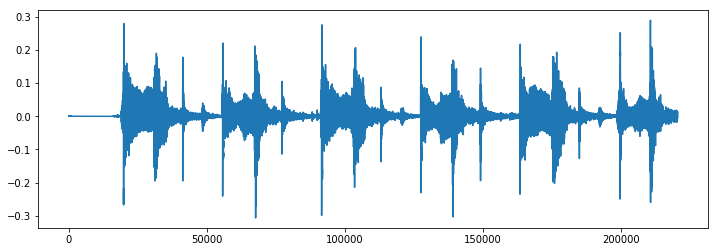

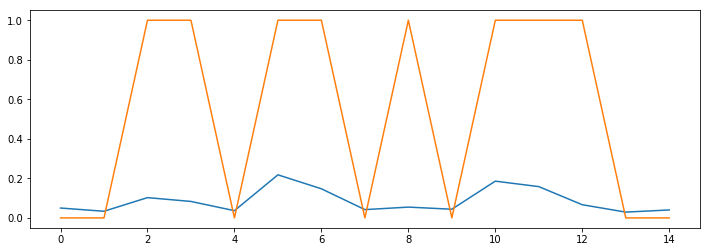

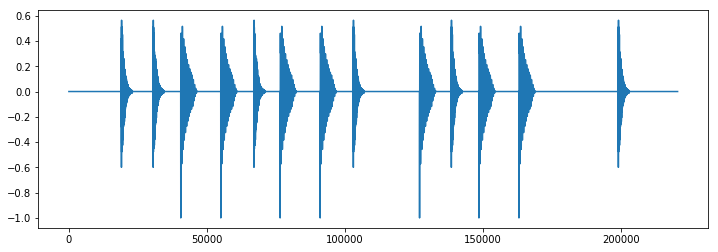

In [367]:
fs = 22050
x = load_wav("./audio/StingSevenDays.wav")
kick_snd = load_wav('audio/kick.wav')
snare_snd = load_wav('audio/snare.wav')

def sonify(locs, snd, len_audio):
    zer = np.zeros(len_audio)
    len_snd = len(snd)
    for loc in locs[:-1]:
        zer[loc:loc+len_snd] = snd
    return zer

kick_locs,snare_locs=kick_snare_detection("./audio/StingSevenDays.wav")

z1 = sonify(kick_locs, kick_snd,len(x))
z2 = sonify(snare_locs, snare_snd,len(x))
synthesized = z1 + z2
plt.figure()
plt.plot(synthesized)
ipd.Audio(synthesized+x, rate=fs)

from scipy.io.wavfile import write
write('SevenDaysMod.wav',22050,synthesized+x)

Lastly, remember to submit the audio file you created in addition to your completed notebook.